## Fisher constraints with CMB+BAO

In [1]:
import numpy as np
from orphics import maps, cosmology,io,stats
from scipy import optimize
import cosmo_cleaner
import matplotlib.pyplot as plt
from cosmo_cleaner import fisher as fisher,plot
from cosmo_cleaner import cosmology,triangle_plot
import camb
import warnings
warnings.filterwarnings('ignore')

Initialize camb with default cosmology parameters

In [2]:
defaultCosmology = {'omch2': 0.1198
                    ,'ombh2': 0.02225
                    ,'H0': 67.3
                    ,'ns': 0.9645
                    ,'As': 2.2e-9
                    ,'mnu': 0.06
                    ,'w0': -1.0
                    ,'tau':0.06
                    ,'nnu':3.046
                    ,'wa': 0.,'bias':2,'A_l':1.2}


nz = 1000
kmax = 0.3
zmin = 0.
ells=np.arange(2000)

pars = camb.CAMBparams()
pars.set_dark_energy(w=defaultCosmology['w0'],wa = defaultCosmology['wa'], dark_energy_model = 'ppf')
pars.set_cosmology(H0=defaultCosmology['H0'], cosmomc_theta = None,ombh2=defaultCosmology['ombh2'], 
               omch2=defaultCosmology['omch2'], mnu=defaultCosmology['mnu'], tau = defaultCosmology['tau'],
               nnu = defaultCosmology['nnu'], num_massive_neutrinos = 3)
#pars.NonLinear = model.NonLinear_both
pars.InitPower.set_params(ns=defaultCosmology['ns'],As=defaultCosmology['As'])

results = camb.get_results(pars)

In [3]:
parameters=['As', 'ns', 'tau']
fiducial=[2.1e-9, 0.968, 0.066]


Load CMB experiment with Planck settings

In [4]:
Planck = cosmology.CMB_Primary(theta_fwhm=[7.], 
                       sigma_T = [33.],
                       sigma_P = [56.],
                       f_sky = 0.65,
                       l_min = 2,
                       l_max = 2500)

The CMB experiment has the compute_fisher_from_camb function. This takes in the results object with default cosmology parameters from CAMB. 
The defaultCosmology is a dict with parameter names and values for the fiducial cosmology.
The parameters are the names of the parameters to be forecasted.

In [5]:
#generate fisher from a Planck like experiment
fisher=Planck.compute_fisher_from_camb(results,defaultCosmology,parameters)
cov=np.linalg.inv(fisher)

Do a triangle plot of the forecasted parameters

generating new axis
['$\\mathrm{As}$', '$\\mathrm{ns}$', '$\\mathrm{tau}$']


(<Figure size 576x576 with 9 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:ylabel='$\\mathrm{ns}$'>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:xlabel='$\\mathrm{As}$', ylabel='$\\mathrm{tau}$'>,
         <AxesSubplot:xlabel='$\\mathrm{ns}$'>,
         <AxesSubplot:xlabel='$\\mathrm{tau}$'>]], dtype=object))

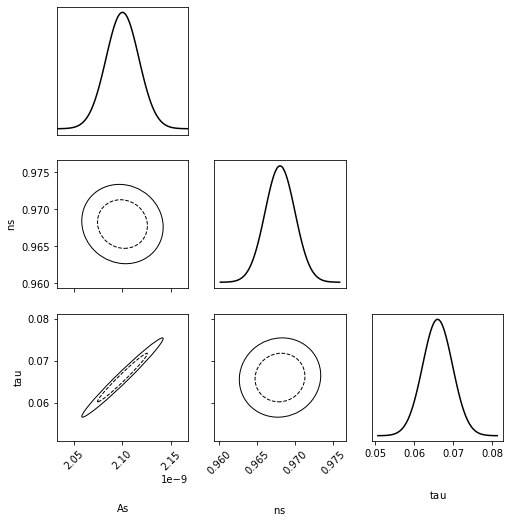

In [9]:
plot_triangle(parameters,fiducial, cov)

BAO Fisher

Load BAO settings with DESI lowz specifications

In [10]:
BAO=cosmology.get_DESI_lowz()

compute the BAO fisher matrix which takes in the defaultCosmology and the parameter list to be varied.

In [12]:
BAO.compute_fisher_from_camb(defaultCosmology,parameters)

[4.33 1.66 1.07 0.91 1.56]
[0.67197396 0.23171288 0.14409243 0.10682169 0.08631214]
[0.02909647 0.00384643 0.00154179 0.00097208 0.00134647]


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [48]:
BAO

## Allison et al plots

In [4]:
pars = np.array( ['ombh2', 'omch2', 'H0',  'As', 'ns', 'tau', 'mnu'])
centers = np.array([0.02222,  0.1197,  69,  2.1955e-9, 0.9655, 0.06, 0.06])
defaultCosmology = {'omch2': 0.1197
                    ,'ombh2': 0.02222
                    ,'H0': 69
                    ,'ns': 0.9655
                    ,'As': 2.2e-9
                    ,'mnu': 0.06
                    ,'w0': -1.0
                    ,'tau':0.06
                    ,'nnu':3.046
                    ,'wa': 0.,'bias':2,'A_l':1.2}


nz = 1000
kmax = 0.3
zmin = 0.
ells=np.arange(2000)

pars = camb.CAMBparams()
pars.set_dark_energy(w=defaultCosmology['w0'],wa = defaultCosmology['wa'], dark_energy_model = 'ppf')
pars.set_cosmology(H0=defaultCosmology['H0'], cosmomc_theta = None,ombh2=defaultCosmology['ombh2'], 
               omch2=defaultCosmology['omch2'], mnu=defaultCosmology['mnu'], tau = defaultCosmology['tau'],
               nnu = defaultCosmology['nnu'], num_massive_neutrinos = 3)
#pars.NonLinear = model.NonLinear_both
pars.InitPower.set_params(ns=defaultCosmology['ns'],As=defaultCosmology['As'])

results = camb.get_results(pars)

In [5]:
#purely cmb with no lensing
Allison_Planck = cosmology.CMB_Primary(l_min=2, l_max=2500, f_sky=0.44)

#BAO lowz+high z
BAO=[cosmology.get_DESI_lowz(),cosmology.get_DESI_highz()]

In [7]:
parameters = np.array( ['ombh2', 'omch2', 'H0',  'As', 'ns', 'tau', 'mnu'])
centers = np.array([0.02222,  0.1197,  69,  2.1955e-9, 0.9655, 0.06, 0.06])

In [8]:
#generate fisher from a Planck like experiment


fisher=Allison_Planck.compute_fisher_from_camb(results,defaultCosmology,parameters)
cov=np.linalg.inv(fisher)

In [30]:
cov

array([[ 4.43434894e-22, -4.74640663e-15,  9.82549612e-14],
       [-4.74640663e-15,  6.53857880e-06,  5.69169488e-07],
       [ 9.82549612e-14,  5.69169488e-07,  2.25787399e-05]])

In [9]:
#BAO lowz+high z
import warnings
warnings.filterwarnings('ignore')
BAO=[cosmology.get_DESI_lowz(),cosmology.get_DESI_highz()]
BAOfisher=np.sum(obs.compute_fisher_from_camb(defaultCosmology,parameters) for obs in BAO)


[4.33 1.66 1.07 0.91 1.56]
[0.68869056 0.23711058 0.14722927 0.10899339 0.08795153]
[0.0298203  0.00393604 0.00157535 0.00099184 0.00137204]
[0.57 0.48 0.47 0.49 0.58 0.6  0.61 0.92 0.98 1.16 1.76 2.88 2.92]
[0.06564998 0.05909226 0.05414373 0.05028937 0.04721111 0.04470218
 0.04262248 0.04087387 0.03938565 0.03810562 0.03699447 0.03602207
 0.03516495]
[0.0003742  0.00028364 0.00025448 0.00024642 0.00027382 0.00026821
 0.00026    0.00037604 0.00038598 0.00044203 0.0006511  0.00103744
 0.00102682]


In [11]:
#combine BAO and CMB
cmb_bao=fisher+BAOfisher
cov_cmb_bao=np.linalg.inv(cmb_bao)

In [12]:
Allison_S3 = [cosmology.CMB_Primary(l_min=50, l_max=3000,
                theta_fwhm=(1.4,), sigma_T=(8.0,), 
                sigma_P=(11.3,), f_sky=0.4),
              cosmology.CMB_Primary(l_min=3000, l_max=4000,
                theta_fwhm=(1.4,), sigma_T=(1e100,),
                sigma_P=(11.3,), f_sky=0.4),
              cosmology.CMB_Primary(l_min=2, 
                                                l_max=50, f_sky=0.44),
              cosmology.CMB_Primary(l_min=50, 
                                                l_max=2500, f_sky=0.2)]

In [13]:
fisher_Allison_S3=np.sum( [obs.compute_fisher_from_camb(results,defaultCosmology,parameters) for obs in Allison_S3], axis=0 )

In [14]:
fisher_s3=fisher_Allison_S3
cov_s3=np.linalg.inv(fisher_s3)
fisher_s3_bao=fisher_Allison_S3+cmb_bao
cov_s3_bao=np.linalg.inv(fisher_s3_bao)

In [52]:
new_kwargs = dict(ls = '--')

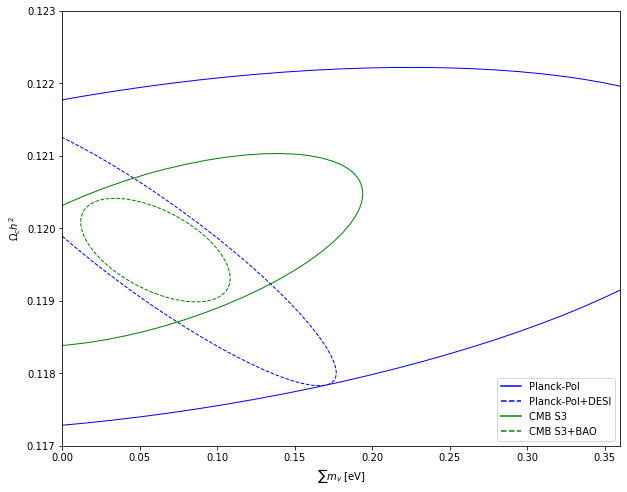

In [60]:
single_fig, single_ax = plt.subplots(figsize=(10,8))
triangle_plot.plot_ellipse(single_ax, 'mnu', 'omch2', parameters, centers,cov,kwargs1={'ls': '-'}, one_sigma_only=True)
triangle_plot.plot_ellipse(single_ax, 'mnu', 'omch2', parameters, centers,cov_cmb_bao, one_sigma_only=True)
triangle_plot.plot_ellipse(single_ax, 'mnu', 'omch2', parameters, centers,cov_s3,kwargs1={'ls': '-','edgecolor':'green'},one_sigma_only=True)
triangle_plot.plot_ellipse(single_ax, 'mnu', 'omch2', parameters, centers,cov_s3_bao,kwargs1={'ls': '--','edgecolor':'green'}, one_sigma_only=True)

single_ax.set_xlim(0,0.06*6)
single_ax.set_ylim(0.117, 0.123)
single_ax.set_ylabel(r"$\Omega_c h^2$")
single_ax.set_xlabel(r"$\sum m_{\nu}$ [eV]")
l1, = single_ax.plot([],[],'-',color="blue")
l2, = single_ax.plot([],[],'--',color="blue")
l3, = single_ax.plot([],[],'-',color="green")
l4, = single_ax.plot([],[],'--',color="green")

single_ax.legend( [l1,l2,l3,l4], \
                    ['Planck-Pol' ,'Planck-Pol+DESI','CMB S3','CMB S3+BAO'], \
              loc = 'lower right', ncol=1, frameon=True );